# Data converter
used for conveting data for rastermap input

In [1]:
import sys
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from rastermap import Rastermap, utils

sys.path.append("/home/gergely/code/sleep/src")

from suite2p_class import Suite2p as s2p
import imaging_data_class as idc
import behavior_class as bc

In [2]:
mouse_id = "140503_2"
imaging_data = idc.ImagingData(mouse_id=mouse_id)
s2p_folders = [
    (index, folder) for index, folder in enumerate(imaging_data.find_suite2p_folders())
]
s2p_folders

Searching for suite2p folders in /data2/gergely/invivo_DATA/sleep/140503_2


[(0,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_16/TSeries-01162024-0853_dendrite-001/TSeries-01162024-0853_dendrite-001.sima/suite2p'),
 (1,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_12/TSeries-01122024-0738_GC1-001/TSeries-01122024-0738_GC1-001.sima/suite2p'),
 (2,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_10_24/TSeries-01102024-0803_GC1-001/TSeries-01102024-0803_GC1-001.sima/suite2p'),
 (3,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_10_24/TSeries-01102024-0803_GC2-002/TSeries-01102024-0803_GC2-002.sima/suite2p'),
 (4,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_18/TSeries-01182024-0805-001/TSeries-01182024-0805-001.sima/suite2p'),
 (5,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_17/TSeries-01172024-0745_dendrites-001/TSeries-01172024-0745_dendrites-001.sima/suite2p')]

In [9]:
s2p_data = s2p(s2p_folders[4][1])
spikes = s2p_data.get_spikes()

In [ ]:
plt.plot(spikes[0])

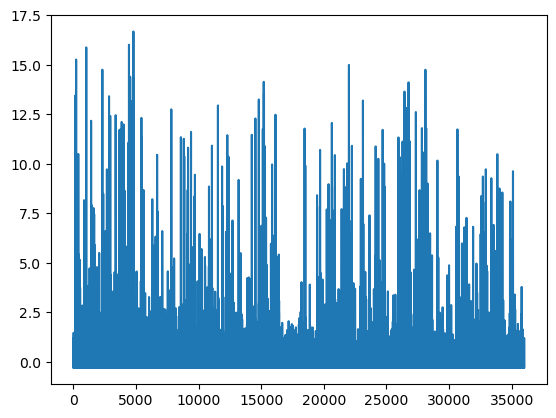

In [10]:
# z scoring
n_neurons, n_time = spikes.shape
spks = zscore(spikes, axis=1)
plt.plot(spks[0])

In [11]:
spks.shape

(55, 36000)

In [8]:
behavior = bc.behaviorData(mouse_id=mouse_id)
behavior_folders = [
    (index, folder) for index, folder in enumerate(behavior.find_behavior_folders())
]
velo = behavior.processed_velocity(behavior_folders[1][1])
speed = behavior.define_immobility(velo)
speed

Searching for behavior folders in /data2/gergely/invivo_DATA/sleep/140503_2
Searching for behavior folders in /data2/gergely/invivo_DATA/sleep/140503_2


0        False
1        False
2        False
3        False
4        False
         ...  
35995    False
35996    False
35997    False
35998    False
35999    False
Name: filtered velo, Length: 36000, dtype: bool

In [12]:
model = Rastermap(
    n_clusters=None,  # None turns off clustering and sorts single neurons
    n_PCs=26,  # use fewer PCs than neurons
    locality=0.15,  # some locality in sorting (this is a value from 0-1)
    time_lag_window=15,  # use future timepoints to compute correlation
    grid_upsample=0,  # 0 turns off upsampling since we're using single neurons
).fit(spks)
y = model.embedding  # neurons x 1
isort = model.isort

normalizing data across axis=1
projecting out mean along axis=0
data normalized, 0.07sec
sorting activity: 55 valid samples by 36000 timepoints
n_PCs = 26 computed, 0.54sec
skipping clustering, n_clusters is None
clusters sorted, time 1.74sec
rastermap complete, time 1.74sec


compute tuning curve for each neuron

In [13]:
n_pos = 15
bins = np.arange(-1, 1 + 1.0 / n_pos, 1.0 / n_pos)
ibin = np.digitize(loc_signed, bins) - 1
n_bins = ibin.max()
inan = np.isnan(loc_signed)
ibin[inan] = -1
tcurves = np.zeros((spks.shape[0], n_bins))
for b in range(n_bins):
    tcurves[:, b] = spks[:, ibin == b].mean(axis=1)
tcurves -= tcurves.mean(axis=1, keepdims=True)

NameError: name 'loc_signed' is not defined